<a href="https://colab.research.google.com/github/financieras/math/blob/main/regresion/regresion_lineal02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal por descenso del gradiente
Se puede llegar a estimar la recta que mejor se ajunta a una nube de puntos por varios métodos:
    1. Método de los mínimos cuadrados
    2. Método del descenso del gradiente

En esta ocasión realizaremos el segundo método que es un método más general para cualquier tipo de función de costes, sea o no convexa.

Para funciones no convexas tendremos que usar el método de optimización del descenso del gradiente.

* Vídeos del canal DotCSV:
1. [Regresión Lineal y Mínimos Cuadrados Ordinarios](https://youtu.be/k964_uNn3l0?si=CrX_Ut2BX80crwMR)
2. [IA NOTEBOOK #1 | Regresión Lineal y Mínimos Cuadrados Ordinarios | Programando IA](https://youtu.be/w2RJ1D6kz-o?si=3F_02_vXuec-PwWD)
3. [¿Qué es el Descenso del Gradiente?](https://youtu.be/A6FiCDoz8_4?si=tYy-0WOvgQMLoQeA)
4. [Descenso del Gradiente (Gradient Descent) | Programando IA](https://youtu.be/-_A_AAxqzCg?si=F_0h1LNfCkd1o6FX)
* Otros vídeos:
    5. [Linear Regression From Scratch in Python (Mathematical)](https://youtu.be/VmbA0pi2cRQ?si=qcarEXGm56AKrsDI)

In [1]:
# obtenemos el archivo data.csv que queda en local para poder usarlo desde este notebook
!wget https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv
# He modificado la URL original para usar la versión "raw" del archivo, que es necesaria para la descarga directa.
# url original:      https://github.com/financieras/math/blob/main/regresion/ft-linear-regression/data/data.csv

!ls
!head -n 5 data.csv

--2024-10-31 19:26:32--  https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281 [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]     281  --.-KB/s    in 0s      

2024-10-31 19:26:32 (3.43 MB/s) - ‘data.csv’ saved [281/281]

data.csv  sample_data
km,price
240000,3650
139800,3800
150500,4400
185530,4450


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('data.csv')    # df representa el DataFrame

# Crear el array X (kilómetros) como vector unidimensional
X = df['km'].values

# Crear el array Y (precios)
Y = df['price'].values

# Verificar la forma de los arrays
print("Forma de X:", X.shape)
print("Forma de Y:", Y.shape)

# Mostrar los primeros elementos de cada array
print("\nPrimeros elementos de X:")
print(X[:5])
print("\nPrimeros elementos de Y:")
print(Y[:5])

Forma de X: (24,)
Forma de Y: (24,)

Primeros elementos de X:
[240000 139800 150500 185530 176000]

Primeros elementos de Y:
[3650 3800 4400 4450 5250]


In [3]:
type(X)     # tanto el vector X como el Y son arrays de Numpi o también llamados ndarrays

numpy.ndarray

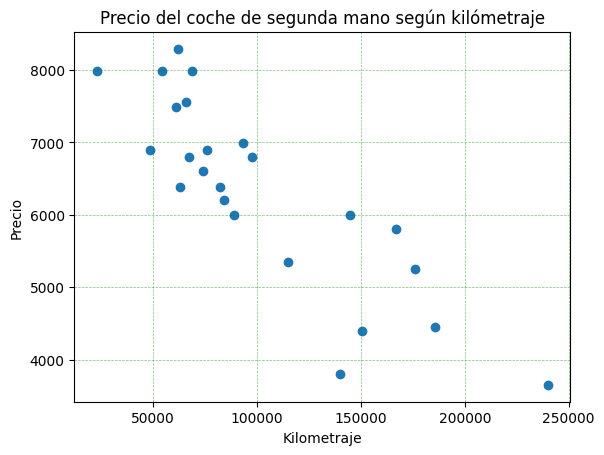

In [4]:
plt.scatter(X, Y)
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Precio del coche de segunda mano según kilómetraje')
plt.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

## Algoritmo del descenso del gradiente

### Primero. Calculemos la función del Error.

$$Error = \frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)^2 $$

Llamemos $J$ a al función de costes, que es el error añadiendo $\frac{1}{2}$ que será conveniente por motivos estéticos cuando derivemos y al multiplicar por 2 se simplifique.

$$J = \frac{1}{2m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)^2 $$

Sustituimos el valor del $y$ real por su recta $\boxed{y=θ_0+θ_1 \cdot x}$

$$J = \frac{1}{2m} \sum_{i=1}^{m} (\widehat{y}_i - (θ_0+θ_1 \cdot x_i))^2 $$

### Segundo. Calculamos las derivadas de la función de Coste
Calculamos las derivadas parciales de la función de costes $J$ respecto a los dos parámetros $θ_0$ y $θ_1$.

$$\frac{\partial J}{\partial \theta_0} = -\frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)$$

$$\frac{\partial J}{\partial \theta_1} = -\frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i) \cdot x_i$$

### Tercero. Introducimos el ratio de aprendizaje
Una vez que tenemos las derivadas parciales, el siguiente paso es utilizarlas para actualizar nuestros parámetros θ₀ y θ₁. Para esto, introducimos el concepto de ratio de aprendizaje, denotado como α (alpha).

El ratio de aprendizaje α es un hiperparámetro que controla el tamaño de los pasos que damos en la dirección opuesta al gradiente. Un α pequeño resultará en pasos pequeños y un aprendizaje lento pero estable, mientras que un α grande puede llevar a un aprendizaje más rápido pero potencialmente inestable.

Ahora podemos expresar las actualizaciones de los parámetros en cada iteración del algoritmo:

$$\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}$$

Sustituyendo las expresiones de las derivadas parciales que calculamos anteriormente, obtenemos:

$$\theta_0 := \theta_0 + \alpha \frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)$$

$$\theta_1 := \theta_1 + \alpha \frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i) \cdot x_i$$

Estas son las ecuaciones fundamentales del algoritmo de descenso del gradiente para la regresión lineal. En cada iteración, actualizamos θ₀ y θ₁ simultáneamente usando estas fórmulas.

El algoritmo completo del descenso del gradiente se puede resumir de la siguiente manera:

1. Inicializar θ₀ y θ₁ con valores aleatorios o cero.
2. Repetir hasta la convergencia o un número máximo de iteraciones:
   - a. Calcular las predicciones ŷᵢ = θ₀ + θ₁ · xᵢ para todos los puntos de datos.
   - b. Actualizar θ₀ y θ₁ simultáneamente usando las ecuaciones anteriores.
3. Retornar los valores finales de θ₀ y θ₁.

Este proceso iterativo continuará hasta que los cambios en θ₀ y θ₁ sean muy pequeños (convergencia) o hasta que se alcance un número máximo predefinido de iteraciones.

Parámetros optimizados (normalizados): [ 2.44156547e-16 -8.56102460e-01]
Parámetros optimizados (desnormalizados): [ 8.49950606e+03 -2.14480376e-02]


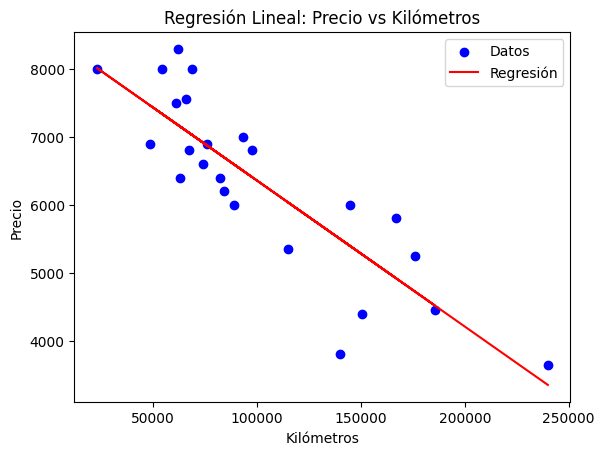

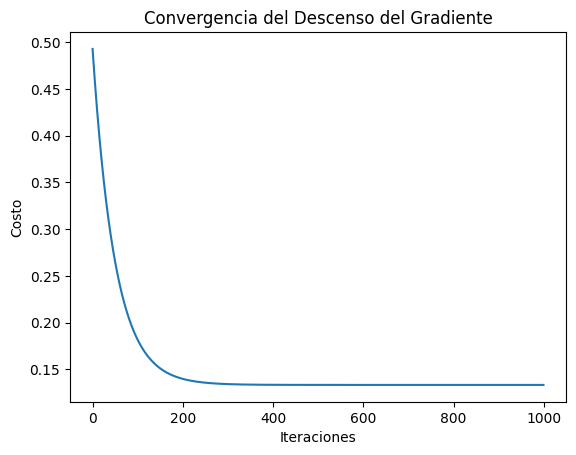

Precio predicho para un coche con 50000 km: 7427.10


In [5]:
# Función para normalizar los datos
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

# Función para desnormalizar los datos
def denormalize(X_norm, X_original):
    return X_norm * np.std(X_original) + np.mean(X_original)

# Normalizar X e Y
X_norm = normalize(X)
Y_norm = normalize(Y)

# Añadir una columna de unos a X para el término independiente
X_norm = np.column_stack((np.ones(len(X_norm)), X_norm))

# Inicializar parámetros
theta = np.zeros(2)
m = len(Y_norm)
alpha = 0.01  # Tasa de aprendizaje
num_iterations = 1000

# Función de costo
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    return np.sum((predictions - Y) ** 2) / (2 * m)

# Función de descenso del gradiente
def gradient_descent(X, Y, theta, alpha, num_iterations):
    costs = []
    for _ in range(num_iterations):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * X.T.dot(predictions - Y)
        cost = compute_cost(X, Y, theta)
        costs.append(cost)
    return theta, costs

# Ejecutar descenso del gradiente
theta, costs = gradient_descent(X_norm, Y_norm, theta, alpha, num_iterations)

# Imprimir los parámetros optimizados
print("Parámetros optimizados (normalizados):", theta)

# Desnormalizar los parámetros
theta_denorm = np.zeros(2)
theta_denorm[1] = theta[1] * np.std(Y) / np.std(X)
theta_denorm[0] = np.mean(Y) - theta_denorm[1] * np.mean(X)

print("Parámetros optimizados (desnormalizados):", theta_denorm)

# Graficar los datos y la línea de regresión
plt.scatter(X, Y, color='blue', label='Datos')
plt.plot(X, theta_denorm[0] + theta_denorm[1] * X, color='red', label='Regresión')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.title('Regresión Lineal: Precio vs Kilómetros')
plt.legend()
plt.show()

# Graficar la convergencia del costo
plt.plot(range(num_iterations), costs)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Convergencia del Descenso del Gradiente')
plt.show()

# Función para hacer predicciones
def predict(X, theta):
    return X.dot(theta)

# Ejemplo de predicción
km_nuevo = 50000  # Ejemplo: predecir el precio para un coche con 50,000 km
km_norm = (km_nuevo - np.mean(X)) / np.std(X)
X_pred = np.array([1, km_norm])
precio_pred_norm = predict(X_pred, theta)
precio_pred = denormalize(precio_pred_norm, Y)

print(f"Precio predicho para un coche con {km_nuevo} km: {precio_pred:.2f}")

In [6]:
# Implementación del método de mínimos cuadrados
X_mincuad = np.column_stack((np.ones(len(X)), X))
theta_mincuad = np.linalg.inv(X_mincuad.T.dot(X_mincuad)).dot(X_mincuad.T).dot(Y)

print("Parámetros por mínimos cuadrados:", theta_mincuad)

Parámetros por mínimos cuadrados: [ 8.49959965e+03 -2.14489636e-02]


In [7]:
# Asumiendo que ya tienes theta_denorm del descenso del gradiente y theta_mincuad de los mínimos cuadrados

# Calcular el error porcentual para theta_0
error_theta0 = abs(theta_denorm[0] - theta_mincuad[0]) / theta_mincuad[0] * 100

# Calcular el error porcentual para theta_1
error_theta1 = abs(theta_denorm[1] - theta_mincuad[1]) / theta_mincuad[1] * 100

# Imprimir los resultados
print("\nComparación entre Descenso del Gradiente y Mínimos Cuadrados:")
print(f"θ₀ (Descenso del Gradiente): {theta_denorm[0]:.2f}")
print(f"θ₀ (Mínimos Cuadrados): {theta_mincuad[0]:.2f}")
print(f"Error porcentual en θ₀: {abs(error_theta0):.3f}%")

print(f"\nθ₁ (Descenso del Gradiente): {theta_denorm[1]:.6f}")
print(f"θ₁ (Mínimos Cuadrados): {theta_mincuad[1]:.6f}")
print(f"Error porcentual en θ₁: {abs(error_theta1):.3f}%")


Comparación entre Descenso del Gradiente y Mínimos Cuadrados:
θ₀ (Descenso del Gradiente): 8499.51
θ₀ (Mínimos Cuadrados): 8499.60
Error porcentual en θ₀: 0.001%

θ₁ (Descenso del Gradiente): -0.021448
θ₁ (Mínimos Cuadrados): -0.021449
Error porcentual en θ₁: 0.004%
